In [2]:
import numpy as np
import pandas as pd
import vectorbt as vbt
import quantstats as qs
import matplotlib.pyplot as plt

from binance import Client
from binance.enums import HistoricalKlinesType

### 抓資料並切割樣本

In [4]:
#get binance data


client = Client()
value = client.get_historical_klines(symbol = 'BTCUSDT', 
                                      interval = '1m', 
                                      start_str = '2024-01-01', 
                                      end_str = '2024-07-08',
                                      klines_type=HistoricalKlinesType.FUTURES)

columns_name = ['openTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'closeTime', 
                'quoteVolume', 'numTrade', 'takerBuyVolume', 'takerBuyQuoteVolume', 'ignore']

df = pd.DataFrame(value)
df.columns = columns_name
df['openTime']= pd.to_datetime(df['openTime'], unit='ms')
df = df.drop(['ignore', 'closeTime'], axis=1)
df = df.sort_values('openTime', ascending=True)
df = df.set_index('openTime')
df = df.astype(float)
df = df[~df.index.duplicated(keep='first')]

In [5]:
interval = '1m'
df.to_csv(f'pricedata_' + interval + '.csv')

In [5]:
interval = '1m'
df = pd.read_csv('pricedata_' + interval + '.csv')
df['openTime'] = pd.to_datetime(df['openTime'])
df.set_index('openTime', inplace=True)
df

,Open,High,Low,Close,Volume,quoteVolume,numTrade,takerBuyVolume,takerBuyQuoteVolume
openTime,,,,,,,,,
2024-01-01 00:00:00,42314.0,42335.8,42289.6,42331.9,289.641,1.225616e+07,3310.0,175.211,7.414460e+06
2024-01-01 00:01:00,42331.9,42353.1,42331.8,42350.4,202.444,8.572241e+06,1885.0,154.353,6.535805e+06
2024-01-01 00:02:00,42350.4,42370.8,42349.6,42360.2,271.521,1.150139e+07,2143.0,193.034,8.176843e+06
2024-01-01 00:03:00,42360.1,42405.8,42360.1,42405.8,392.238,1.662644e+07,3551.0,332.749,1.410472e+07
2024-01-01 00:04:00,42405.7,42437.2,42405.7,42437.1,568.366,2.411261e+07,4479.0,419.524,1.779786e+07
...,...,...,...,...,...,...,...,...,...
2024-07-07 23:56:00,55921.5,55949.6,55913.9,55914.0,258.214,1.444279e+07,2807.0,144.341,8.073480e+06
2024-07-07 23:57:00,55913.9,55914.0,55852.1,55865.4,466.015,2.604395e+07,3342.0,69.714,3.896094e+06
2024-07-07 23:58:00,55865.4,55875.5,55780.0,55829.6,622.761,3.475902e+07,4400.0,215.720,1.204011e+07


In [6]:
#split to in and out sample
price_all = df[['Open', 'High', 'Low', 'Close']]
price_is = price_all['2024-01-01':'2024-6-30'] # in sample data
price_os = price_all['2024-07-01':'2024-07-08'] # out sample data
print(price_all)
print(price_is)
print(price_os)

                        Open     High      Low    Close
openTime                                               
2024-01-01 00:00:00  42314.0  42335.8  42289.6  42331.9
2024-01-01 00:01:00  42331.9  42353.1  42331.8  42350.4
2024-01-01 00:02:00  42350.4  42370.8  42349.6  42360.2
2024-01-01 00:03:00  42360.1  42405.8  42360.1  42405.8
2024-01-01 00:04:00  42405.7  42437.2  42405.7  42437.1
...                      ...      ...      ...      ...
2024-07-07 23:56:00  55921.5  55949.6  55913.9  55914.0
2024-07-07 23:57:00  55913.9  55914.0  55852.1  55865.4
2024-07-07 23:58:00  55865.4  55875.5  55780.0  55829.6
2024-07-07 23:59:00  55829.6  55839.2  55812.8  55830.9
2024-07-08 00:00:00  55831.0  55896.9  55796.5  55890.3

[272161 rows x 4 columns]
                        Open     High      Low    Close
openTime                                               
2024-01-01 00:00:00  42314.0  42335.8  42289.6  42331.9
2024-01-01 00:01:00  42331.9  42353.1  42331.8  42350.4
2024-01-01 00:02:00  

### 定義策略

In [7]:
#double rsi as signal and filter
def rsi_long(close, rsi_window = 29, filter_window = 50):

    rsi_crossover = vbt.RSI.run(close, window=rsi_window).rsi_crossed_above(70).to_numpy()
    rsi_crossunder = vbt.RSI.run(close, window=rsi_window).rsi_crossed_below(30).to_numpy()

    rsi_filter = vbt.RSI.run(close, window = filter_window).rsi.to_numpy()

    signal = np.where(rsi_crossover & (rsi_filter > 70), 1, 0)
    signal = np.where(rsi_crossunder & (rsi_filter < 30), -1, signal)

    return signal

def rsi_short(close, rsi_window = 29, filter_window = 50):

    rsi_crossover = vbt.RSI.run(close, window=rsi_window).rsi_crossed_above(70).to_numpy()
    rsi_crossunder = vbt.RSI.run(close, window=rsi_window).rsi_crossed_below(30).to_numpy()

    rsi_filter = vbt.RSI.run(close, window = filter_window).rsi.to_numpy()

    signal = np.where(rsi_crossunder & (rsi_filter < 30), 1, 0)
    signal = np.where(rsi_crossover & (rsi_filter > 70), -1, signal)

    return signal

MyInd_long = vbt.IndicatorFactory(
    class_name = 'rsi_long',
    short_name = 'long',
    input_names = ['close'],
    param_names = ['rsi_window', 'filter_window'],
    output_names = ['signals'] 
).from_apply_func(rsi_long, keep_pd=True)

MyInd_short = vbt.IndicatorFactory(
    class_name = 'rsi_short',
    short_name = 'short',
    input_names = ['close'],
    param_names = ['rsi_window', 'filter_window'],
    output_names = ['signals'] 
).from_apply_func(rsi_short, keep_pd=True)


### 參數優化

In [12]:
#run strategy and do parameter optimization on in sample data

win = np.arange(1, 50)
signal = MyInd_short.run(price_is['Close'] , rsi_window=win, filter_window=win, param_product = True)

entries = signal.signals == 1
exits = signal.signals == -1

portfolio_short = vbt.Portfolio.from_signals(
    price_is['Close'], 
    entries, 
    exits,
    freq = '1m', 
    direction = 'shortonly', 
    sl_stop = 0.03,
    fees = 0.0015
)

signal = MyInd_long.run(price_is['Close'] , rsi_window=win, filter_window=win, param_product = True)

entries = signal.signals == 1
exits = signal.signals == -1

portfolio_long = vbt.Portfolio.from_signals(
    price_is['Close'], 
    entries, 
    exits,
    freq = '1m', 
    direction = 'longonly', 
    sl_stop = 0.03,
    fees = 0.0015
)

print(portfolio_long.sharpe_ratio().sort_values())
print(portfolio_short.sharpe_ratio().sort_values())

long_rsi_window  long_filter_window
1                1                    -97.089907
2                2                    -95.128305
3                3                    -91.628422
2                1                    -91.365326
3                2                    -88.512505
                                         ...    
4                47                     2.673701
5                47                     2.813779
11               47                     2.828973
7                48                     2.929242
15               49                     3.103838
Name: sharpe_ratio, Length: 2401, dtype: float64


In [12]:
pf_long = pd.concat([portfolio_long.total_return(),  portfolio_long.sharpe_ratio()], axis=1)
pf_short = pd.concat([portfolio_short.total_return(),  portfolio_short.sharpe_ratio()], axis=1)

In [14]:
# 畫出參數高原
import plotly.graph_objects as go

x = pf_long.loc[pf_long['total_return'] > 0].index.get_level_values(0)
y = pf_long.loc[pf_long['total_return'] > 0].index.get_level_values(1)
z = pf_long.loc[pf_long['total_return'] > 0]['total_return']
data = (pf_long.loc[pf_long['total_return'] > 0]['sharpe_ratio'])
scatter_data = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        color=data,  # 将第四维数据用颜色表示
        colorscale='Viridis',
        colorbar=dict(title='Sharpe')  # 添加颜色条
    )
)

# 创建图布局
layout = go.Layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis=dict(title='rsi_window'),
        yaxis=dict(title='filter_window'),
        zaxis=dict(title='return')
    )
)

# 创建图像的 Figure 对象并绘制图像
fig = go.Figure(data=[scatter_data], layout=layout)
fig.show()
fig.write_html(file = '3d_plot.html' , auto_open  = True)#圖片儲存並自動展

In [10]:
#select strategies with best sharpe ratio
#idx_best_10_sharpe = pf.loc[pf.index.get_level_values(0) > 25].sort_values(by = 'sharpe_ratio', ascending=False).index[0:10].to_list()
#idx_best_10_return = pf.loc[pf.index.get_level_values(0) > 25].sort_values(by = 'total_return', ascending=False).index[0:10].to_list()


#idx_best_5_sharpe_short = pf_short.loc[np.logical_and(pf_short.index.get_level_values(0) > 25, pf_short.index.get_level_values(0) < pf_short.index.get_level_values(1))].sort_values(by = 'sharpe_ratio', ascending=False).index[0:5].to_list()
#idx_best_5_sharpe_long = pf_long.loc[np.logical_and(pf_long.index.get_level_values(0) > 25, pf_long.index.get_level_values(0) < pf_long.index.get_level_values(1))].sort_values(by = 'sharpe_ratio', ascending=False).index[0:5].to_list()
idx_best_5_sharpe_long = [(4, 47), (5, 47), (11, 47), (7, 48), (15, 49)]


#idx_best_5_return = pf.loc[pf.index.get_level_values(0) > 25].sort_values(by = 'total_return', ascending=False).index[0:5].to_list()
#print("best 10 sharpe: " + str(idx_best_10_sharpe))
#print("best 10 return: " + str(idx_best_10_return))
#print("best 5 sharpe short: " + str(idx_best_5_sharpe_short))
print("best 5 sharpe long: " + str(idx_best_5_sharpe_long))
#print("best 5 return: " + str(idx_best_5_return))

best 5 sharpe long: [(4, 47), (5, 47), (11, 47), (7, 48), (15, 49)]


In [20]:
entries_list = []
exits_list = []
'''
for param in idx_best_5_sharpe_short:

    signal = MyInd_short.run(price_all['Close'] , rsi_window=param[0], filter_window=param[1], param_product = True)

    entries = signal.signals == 1
    exits = signal.signals == -1
    entries_list.append(entries)
    exits_list.append(exits)

entries_df = pd.concat(entries_list, axis = 1)
exits_df = pd.concat(exits_list, axis = 1)

portfolio_short = vbt.Portfolio.from_signals(
    price_all['Close'], 
    entries_df, 
    exits_df,
    freq = '15m', 
    direction = 'shortonly',
    sl_stop = 0.025,
    fees = 0.0015
)

print(portfolio_short.returns())
'''


entries_list = []
exits_list = []

for param in idx_best_5_sharpe_long:

    signal = MyInd_long.run(price_all['Close'] , rsi_window=param[0], filter_window=param[1], param_product = True)

    entries = signal.signals == 1
    exits = signal.signals == -1
    entries_list.append(entries)
    exits_list.append(exits)

entries_df = pd.concat(entries_list, axis = 1)
exits_df = pd.concat(exits_list, axis = 1)

portfolio_long = vbt.Portfolio.from_signals(
    price_all['Close'], 
    entries_df, 
    exits_df,
    freq = '1m', 
    direction = 'longonly',
    sl_stop = 0.03,
    fees = 0.0015
)

print(portfolio_long.returns())

                       4     5     11    7     15
                       47    47    47    48    49
                    Close Close Close Close Close
openTime                                         
2024-01-01 00:00:00   0.0   0.0   0.0   0.0   0.0
2024-01-01 00:01:00   0.0   0.0   0.0   0.0   0.0
2024-01-01 00:02:00   0.0   0.0   0.0   0.0   0.0
2024-01-01 00:03:00   0.0   0.0   0.0   0.0   0.0
2024-01-01 00:04:00   0.0   0.0   0.0   0.0   0.0
...                   ...   ...   ...   ...   ...
2024-07-07 23:56:00   0.0   0.0   0.0   0.0   0.0
2024-07-07 23:57:00   0.0   0.0   0.0   0.0   0.0
2024-07-07 23:58:00   0.0   0.0   0.0   0.0   0.0
2024-07-07 23:59:00   0.0   0.0   0.0   0.0   0.0
2024-07-08 00:00:00   0.0   0.0   0.0   0.0   0.0

[272161 rows x 5 columns]


InvalidIndexError: (4, 47, 'Close')

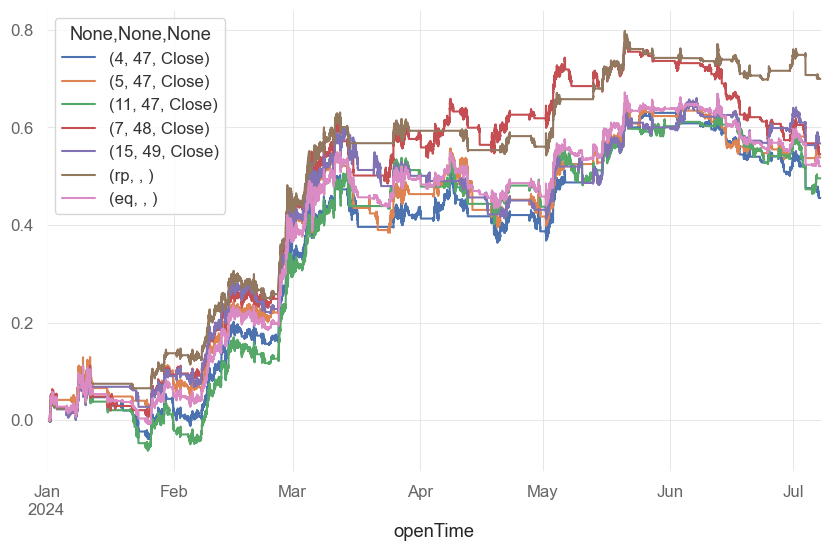

In [22]:
#rett_s = portfolio_short.returns()
rett_l = portfolio_long.returns()

#rett = pd.concat([rett_s, rett_l], axis=1)
rett = rett_l

n = 72 * 6
rolling_risk = rett.rolling(n).std()
w_df_ = ((1/rolling_risk).T/(1/rolling_risk).sum(axis = 1)).T

rett['rp'] = (rett * w_df_).sum(axis=1)
rett['eq'] = rett.iloc[:, :5].mean(axis = 1)
#rett['shortonly'] = rett.iloc[:, :5].mean(axis = 1)
#rett['longonly'] = rett.iloc[:, 5:10].mean(axis = 1)

rett.cumsum().plot()

df_metrics = pd.DataFrame()
for col in rett.columns:
    df_metrics[col] = qs.reports.metrics(rett[col], mode='full', display=False, periods_per_year = 60 * 24 * 365)

df_metrics.head(50)

<Axes: title={'center': 'Cumsum'}, xlabel='openTime'>

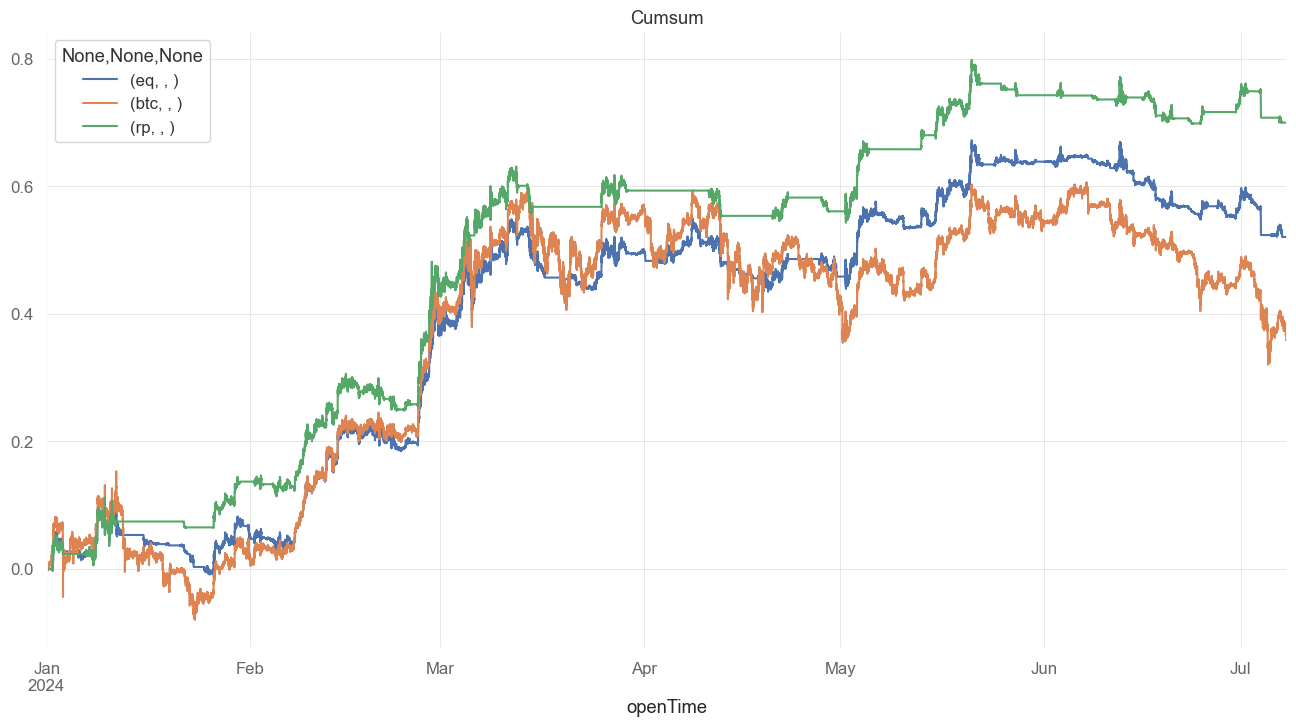

In [24]:
from datetime import datetime

rett['btc'] = df['Close'].pct_change()
fig, ax = plt.subplots(figsize=(16,8))
rett[['eq', 'btc', 'rp']].cumsum().plot(ax=ax, title = 'Cumsum')

In [26]:
qs_metrics = pd.DataFrame()

periods = 60 * 24 * 365

qs_metrics["benchmark"] = qs.reports.metrics(rett['btc'], mode='full', display=False, periods_per_year = periods, compounded=False)
qs_metrics["eq_in_sample"] = qs.reports.metrics(rett['eq']['2024-01-01':'2024-6-30'], mode='full', display=False, periods_per_year = periods, compounded = False)
qs_metrics["eq_out_sample"] = qs.reports.metrics(rett['eq']['2024-07-01':'2024-07-08'], mode='full', display=False, periods_per_year = periods, compounded = False)
qs_metrics["eq_all"] = qs.reports.metrics(rett['eq'], mode='full', display=False, periods_per_year = periods, compounded = False)
qs_metrics["rp_in_sample"] = qs.reports.metrics(rett['rp']['2024-01-01':'2024-6-30'], mode='full', display=False, periods_per_year = periods, compounded = False)
qs_metrics["rp_out_sample"] = qs.reports.metrics(rett['rp']['2024-07-01':'2024-07-08'], mode='full', display=False, periods_per_year = periods, compounded = False)
qs_metrics["rp_all"] = qs.reports.metrics(rett['rp'], mode='full', display=False, periods_per_year = periods, compounded = False)


In [30]:
def calculate_sharpe(series, periods):
    mean_return = series.mean()
    std = series.std()
    period_sharpe = mean_return / std
    annualized_sharpe = period_sharpe * np.sqrt(periods)
    return annualized_sharpe

sharpe = calculate_sharpe(rett['btc'], 60*24*365)
print(sharpe)

1.232411137529922


In [28]:
qs_metrics.head(60)
#qs_metrics.to_csv('metrics.csv')

,benchmark,eq_in_sample,eq_out_sample,eq_all,rp_in_sample,rp_out_sample,rp_all
Start Period,2024-01-01,2024-01-01,2024-07-01,2024-01-01,2024-01-01,2024-07-01,2024-01-01
End Period,2024-07-08,2024-06-30,2024-07-08,2024-07-08,2024-06-30,2024-07-08,2024-07-08
Risk-Free Rate,0,0,0,0,0,0,0
Time in Market,1.0,0.79,0.66,0.79,0.42,0.25,0.42
Total Return,0.36,0.58,-0.06,0.52,0.74,-0.04,0.7
CAGR﹪,0.51,0.89,-0.9,0.75,1.17,-0.81,1.03
Sharpe,1.23,3.09,-13.29,2.69,4.38,-11.12,4.01
Prob. Sharpe Ratio,0.81,0.99,0.03,0.97,1.0,0.05,1.0
Smart Sharpe,1.19,2.98,-12.63,2.6,4.24,-10.45,3.88
Sortino,1.72,4.32,-16.77,3.76,6.15,-13.79,5.62


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2020-01-02   2020-01-02
End Period                 2024-03-09   2024-03-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       98.0%

Total Return               330.39%      224.47%
CAGR﹪                     27.23%       21.44%

Sharpe                     1.11         2.27
Prob. Sharpe Ratio         98.89%       100.0%
Smart Sharpe               1.11         2.25
Sortino                    1.59         3.24
Smart Sortino              1.58         3.22
Sortino/√2                 1.12         2.29
Smart Sortino/√2           1.11         2.27
Omega                      1.05         1.05

Max Drawdown               -77.27%      -15.45%
Longest DD Days            847          216
Volatility (ann.)          70.82%       23.64%
R^2                        0.01         0.01
Information Ratio          -0.0         -0.0
Calmar             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-09-13,2023-01-10,2023-01-29,139,-15.446086,-15.193401
2,2022-02-24,2022-05-05,2022-06-13,110,-12.756969,-12.504103
3,2023-03-22,2023-06-19,2023-10-23,216,-12.654211,-12.231528
4,2021-05-19,2021-07-12,2021-07-26,68,-11.347170,-10.772202
5,2021-01-08,2021-02-02,2021-03-10,62,-10.569898,-10.358454


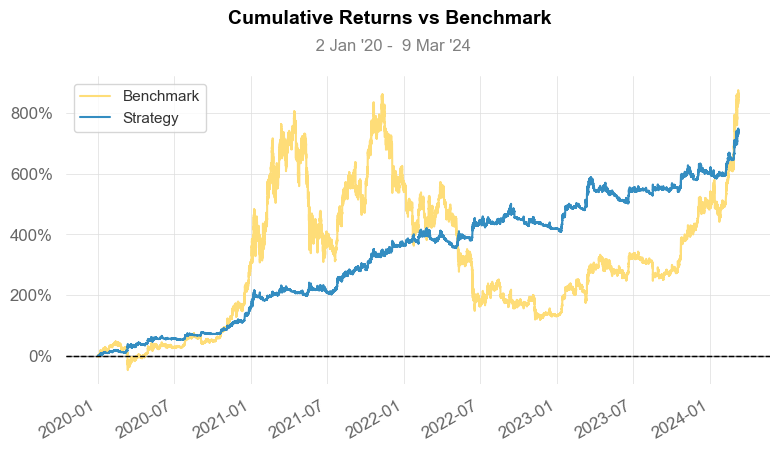

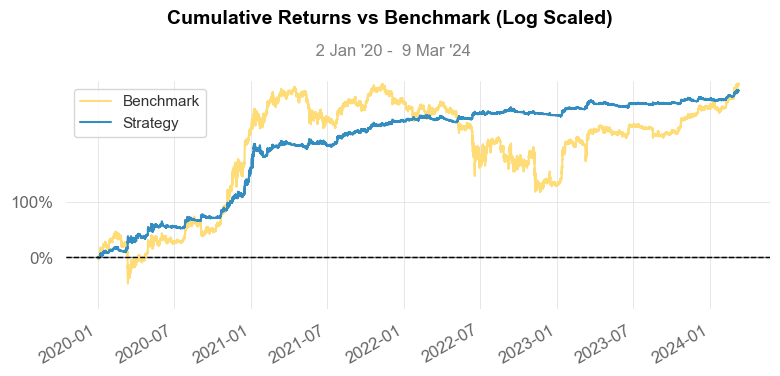

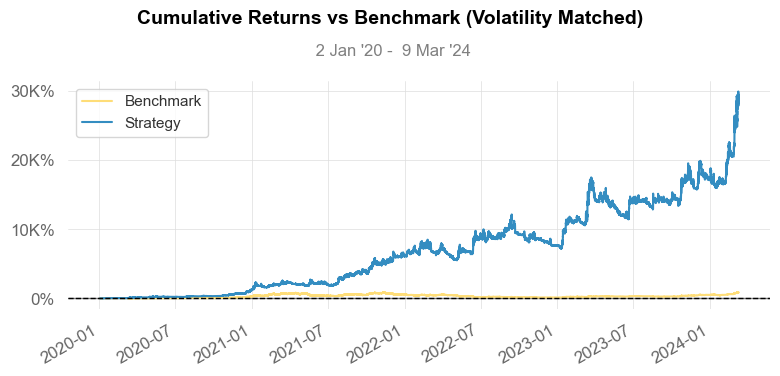

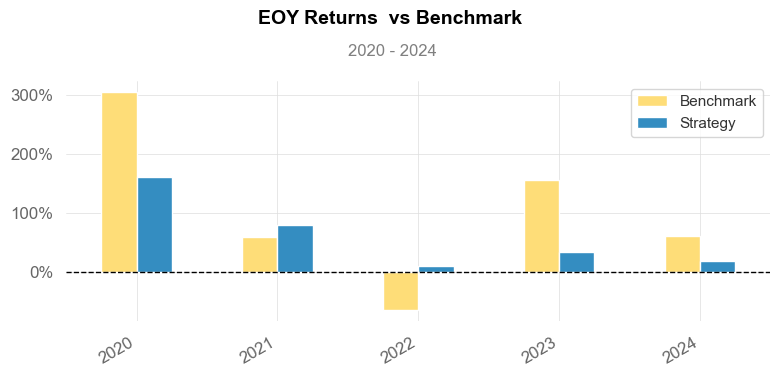

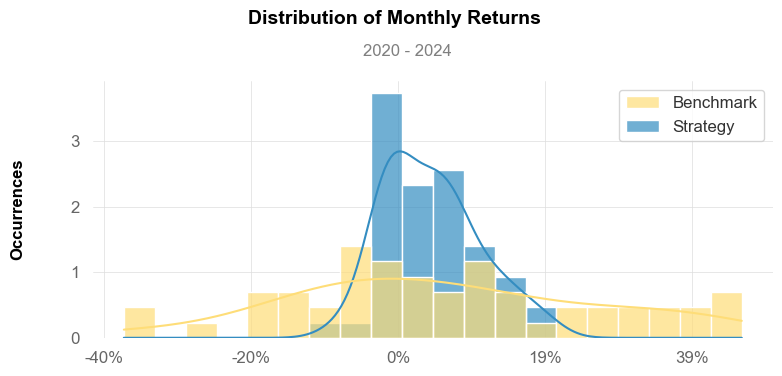

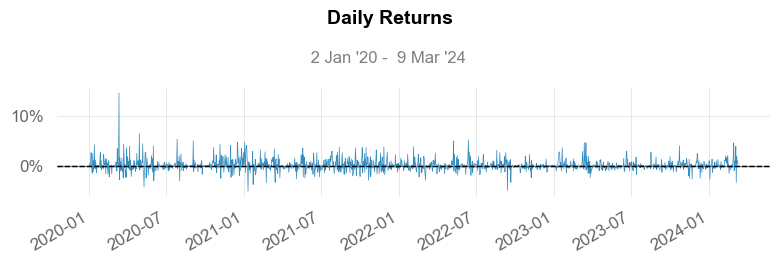

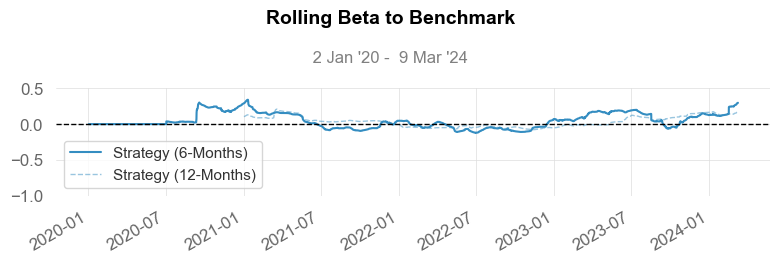

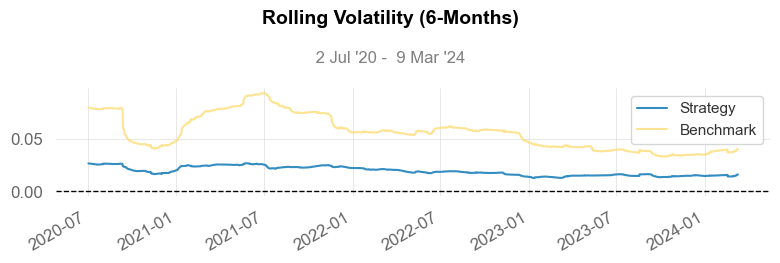

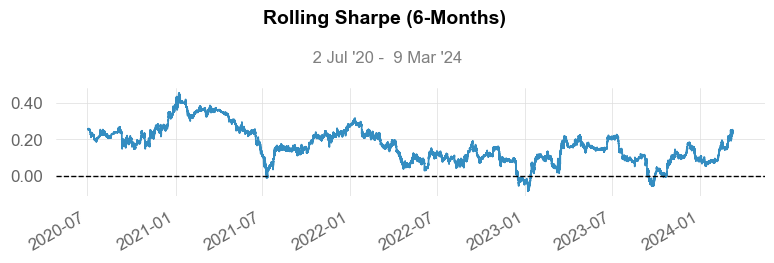

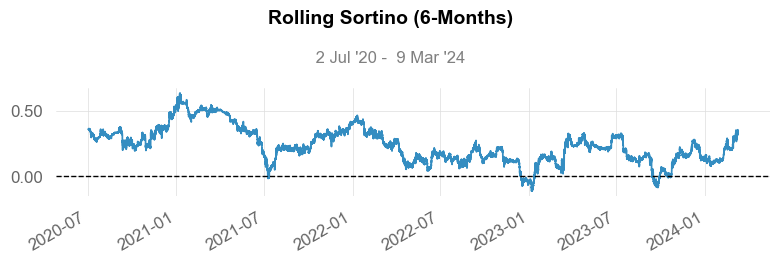

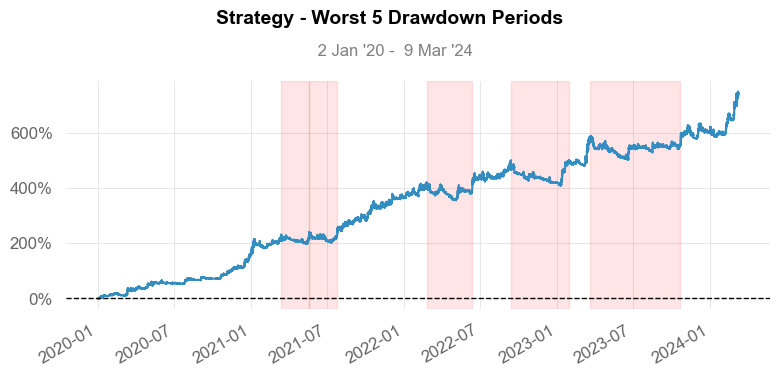

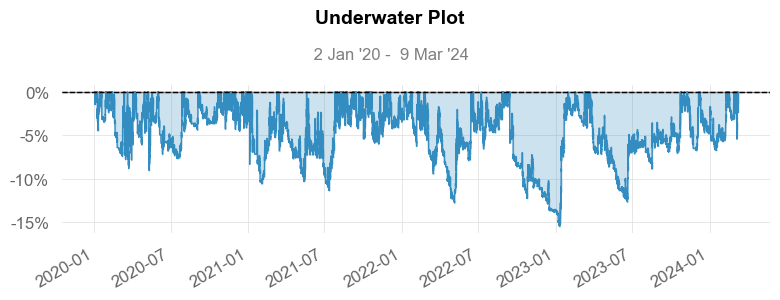

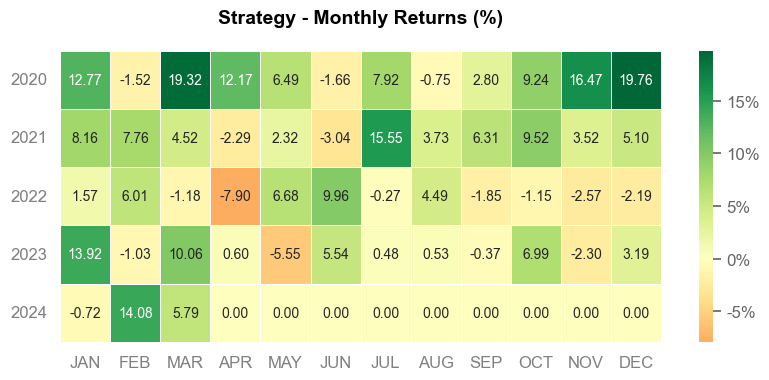

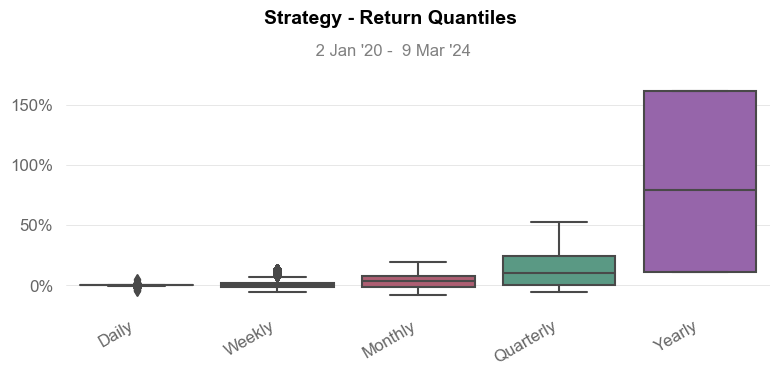

In [23]:
qs.reports.full(rett['eq'], benchmark = rett['btc'], periods_per_year = 4 * 24 *365, compounded = False, active_returns = False)